In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [31]:
data = pd.read_excel("C:\\Users\\Phil\\CaseStudy\\PSP_DATA_PREP.xlsx")
data.head()

,amount,success,3D_secured,hour,day_of_week,month,amount_norm,card_Diners,card_Master,card_Visa,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card
0,89,0,0,0,1,1,0.133013,0,0,1,0,1,0,0,0,0,1
1,89,1,0,0,1,1,0.133013,0,0,1,0,1,0,0,0,0,1
2,238,0,1,0,1,1,0.371795,1,0,0,0,1,0,0,0,0,1
3,238,1,1,0,1,1,0.371795,1,0,0,0,1,0,0,0,0,1
4,124,0,0,0,1,1,0.189103,1,0,0,1,0,0,0,0,1,0


In [32]:
# Define the feature matrix X and target y, and split data into training and testing sets
X = data.drop(columns=['success'])
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8111485816306289
Precision: 0.6176470588235294
Recall: 0.021875
F1: 0.04225352112676056


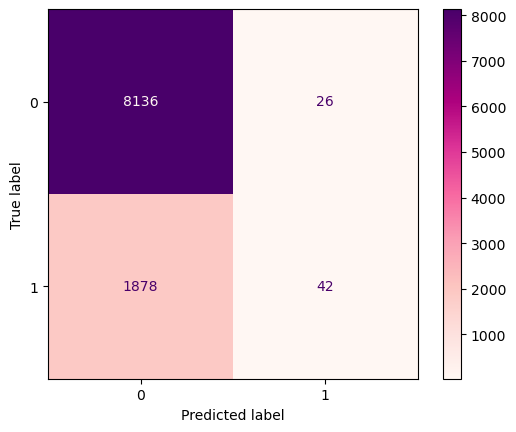

In [33]:
# Train a logistic regression model and make a prediction
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# Evaluate the model 
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy_log}\nPrecision: {precision_log}\nRecall: {recall_log}\nF1: {f1_log}")

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [34]:
# Create a class balanced data set with SMOTE to retrain models on
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

Accuracy: 0.8494854202401372
Precision: 0.9865256694524988
Recall: 0.7086498407253125
F1: 0.824812834224599


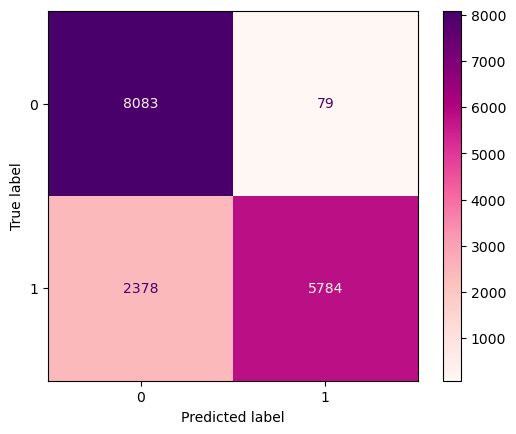

In [35]:
# Train a new logistic regression model with SMOTE balanced classes
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_model.predict(X_test_smote)

# Evalute Accuracy
accuracy_log_bal = accuracy_score(y_test_smote, smote_y_pred)
precision_log_bal = precision_score(y_test_smote, smote_y_pred)
recall_log_bal = recall_score(y_test_smote, smote_y_pred)
f1_log_bal = f1_score(y_test_smote, smote_y_pred)

print(f"Accuracy: {accuracy_log_bal}\nPrecision: {precision_log_bal}\nRecall: {recall_log_bal}\nF1: {f1_log_bal}")

# Display the confusion matrix
smote_cm = confusion_matrix(y_test_smote, smote_y_pred)
disp = ConfusionMatrixDisplay(smote_cm)
disp.plot(cmap='RdPu')
plt.show()

Accuracy: 0.7668121404483238
Precision: 0.23687423687423687
Recall: 0.10104166666666667
F1: 0.1416575392479007


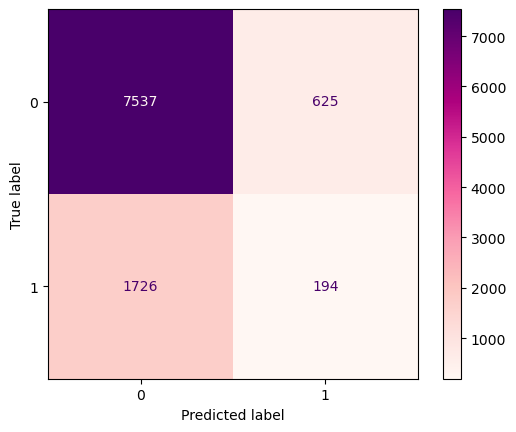

In [36]:
#Random forest model without SMOTE balanced classes
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_unbalanced = rf_model.predict(X_test)

#assess accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf_unbalanced)
precision_rf = precision_score(y_test, y_pred_rf_unbalanced)
recall_rf = recall_score(y_test, y_pred_rf_unbalanced)
f1_rf = f1_score(y_test, y_pred_rf_unbalanced)

print(f"Accuracy: {accuracy_rf}\nPrecision: {precision_rf}\nRecall: {recall_rf}\nF1: {f1_rf}")

#display the confusion matrix
rf_cm_unbalanced = confusion_matrix(y_test, y_pred_rf_unbalanced)
disp = ConfusionMatrixDisplay(rf_cm_unbalanced)
disp.plot(cmap='RdPu')

Accuracy: 0.8233888752756677
Precision: 0.8779894028354576
Recall: 0.7511639304092135
F1: 0.8096401452624629


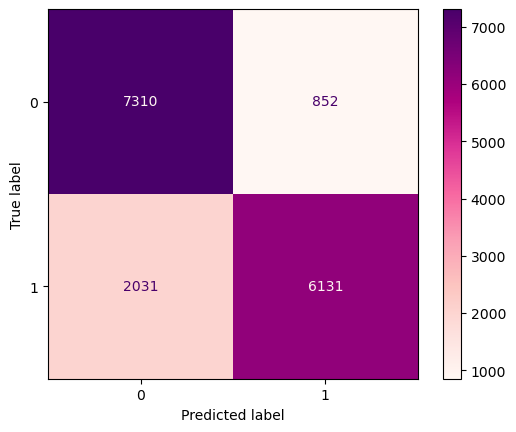

In [37]:
#Train Random forest Model with SMOTE balanced classes
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test_smote)

#Assess accuracy for randomforest model
accuracy_rf_bal = accuracy_score(y_test_smote, y_pred_rf)
precision_rf_bal = precision_score(y_test_smote, y_pred_rf)
recall_rf_bal = recall_score(y_test_smote, y_pred_rf)
f1_rf_bal = f1_score(y_test_smote, y_pred_rf)

print(f"Accuracy: {accuracy_rf_bal}\nPrecision: {precision_rf_bal}\nRecall: {recall_rf_bal}\nF1: {f1_rf_bal}")

#display the confusion matrix
rf_cm = confusion_matrix(y_test_smote, y_pred_rf)
disp = ConfusionMatrixDisplay(rf_cm)
disp.plot(cmap='RdPu')

In [41]:
results = pd.DataFrame()
results['Key'] = ['Accuracy', 'Precision', 'Recall', 'F1']
results['Logistic'] = [accuracy_log, precision_log, recall_log, f1_log]
results['RandomForest'] = [accuracy_rf, precision_rf, recall_rf, f1_rf]
results['Logistic_Balanced'] = [accuracy_log_bal, precision_log_bal, recall_log_bal, f1_log_bal]
results['RandomForest_Balanced'] = [accuracy_rf_bal, precision_rf_bal, recall_log_bal, f1_rf_bal]
results.T

,0,1,2,3
Key,Accuracy,Precision,Recall,F1
Logistic,0.811149,0.617647,0.021875,0.042254
RandomForest,0.766812,0.236874,0.101042,0.141658
Logistic_Balanced,0.849485,0.986526,0.70865,0.824813
RandomForest_Balanced,0.823389,0.877989,0.70865,0.80964
